# **Visualiser des images: partie 2**

## Introduction à l'analyse des images - 32M7132

*Adrien Jeanrenaud (adrien.jeanrenaud@unige.ch)*

<div class="alert alert-block alert-info">
<b>Visualiser des images partie 1</b> : dernière étape de notre voyage des le traitement numériques des images en deux dimensions. Après avoir traité nos images et en avoir extrait des informations, il est nécessaire de les rendre visibles. Python permet de visualiser les images en quantité. La manière dont elles peuvent être disposées permet également de retirer des informations
</div>

## **Plan du cours**

> **Corrigé de l'exercice**
> * Du dossier au notebook
> * Visualiser avec les informations

> **Visualiser avec matplotlib**
> * Visualiser un boucle
> * Les images sur un graphique
> * Visualiser l'image et ses informations
> * Enregistrer ses visualisation 

> **Visualiser en mosaïque**
> * Une mosïque d'images redimensionnées
> * Concaténation verticale
> * Concaténation horizontale
> * Une fonction pour faire des mosaïques ?


In [1]:
# importer les librairies nécessaires

import numpy as np
import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt

## **Corrigé de l'exercice**

Avant de corriger l'exercice, revenons sur le contenu de la semaine dernière.

### Du dossier au notebook

D'abord un petit rappel sur la fonction qui permet d'importer les images depuis un dossier sur notre notebook avec Python (si nécessaire).

In [2]:
def importer_images(path):
    
    liste_images = []
    ext = [".jpeg", ".png", ".jpg"]
    dossier = os.listdir(path)
    for files in dossier:
        if files.endswith(tuple(ext)):
            image_dossier = os.path.join(path, files)
            image = cv2.imread(image_dossier)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            liste_images.append(image)
    return liste_images

In [3]:
# dans quel dossier nous sommes

os.getcwd()

'/Users/jeanrenaud/Documents/UniGE/cours/cours_images_2022'

In [4]:
# fichiers et dossiers où nous sommes

os.listdir(".")

['matched_images_1.jpg',
 'kmeans6_1660508556086103215_LouisValtat_1908.jpg',
 'wikiart_scraped.csv',
 'cours7_filtres.ipynb',
 'matched_images_2.jpg',
 'fauvisme1904_1908.tpy',
 'kmeans6_9288238554096296368_HenriMatisse_1905.jpg',
 'matched_images_3.jpg',
 '.DS_Store',
 'color.ipynb',
 'matched_images_akaze.jpg',
 '18264555600660502829_AndreDerain_1906.jpg',
 'fauve_manuel.csv',
 'pasolini.jpg',
 'image_name.jpg',
 'cours6_manipulations_part2.ipynb',
 'export_explore',
 'fauve.jpg',
 'matched_images.jpg',
 'fauvisme_1904_1908',
 'p3.png',
 'name_1716482144495116223_SoniaDelaunay_1907.jpg',
 'cours10_visualisationsPart1.ipynb',
 'extensions.svg',
 'p2.png',
 'unige.jpg',
 'cours4-machine_image.ipynb',
 'kmeans6_846667021266391146_MauricedeVlaminck_1907.jpg',
 'haarcascade_frontalface_alt.xml',
 'p1.png',
 'concat.jpg',
 'cours5_manipulations_part1.ipynb',
 'cours_images_2022.txt',
 'export_explore.tpy',
 'name2_1716482144495116223_SoniaDelaunay_1907.jpg',
 'explore_export.csv',
 'cours

In [5]:
# Utilisons la fonction

mes_images = importer_images(path="fauvisme1904_1908")

In [6]:
len(mes_images)

186

### Visualiser avec les informations

<div class="alert alert-block alert-warning">
<b>Exercice</b>: importer le dossier contenant les images fauves (en liant le chemin et le nom du fichier dans le tableur) et visualiser, à l'aide d'une boucle, uniquement les réalisation de Sonia Delaunay en imprimant également le nom de le titre de l'oeuvre ainsi que la date.</div>

In [7]:
# importer le csv

df = pd.read_csv("fauvisme1904_1908.csv", index_col=[0])

In [8]:
df.head()

Style                      Artwork               Artist  Date  \
66424  Fauvism     Pierre with Wooden Horse        Henri Matisse  1904   
66425  Fauvism  Place des Lices, St. Tropez        Henri Matisse  1904   
66426  Fauvism                 The Gardener  Maurice de Vlaminck  1904   
66427  Fauvism        Landscape near Chatou         Andre Derain  1904   
66428  Fauvism                        Music         Andre Derain  1904   

                                                    Link  \
66424  https://uploads4.wikiart.org/images/henri-mati...   
66425  https://uploads5.wikiart.org/images/henri-mati...   
66426  https://uploads2.wikiart.org/images/maurice-de...   
66427  https://uploads2.wikiart.org/images/andre-dera...   
66428  https://uploads2.wikiart.org/images/andre-dera...   

                                             Filename  
66424         77871347142634460_HenriMatisse_1904.jpg  
66425       4691604282671572073_HenriMatisse_1904.jpg  
66426  2760939596788927071_MauricedeVlaminck_1904.jpg  
66427        6725180920406777929_AndreDerain_1904.jpg  
66428        7927828486181830000_AndreDerain_1904.jpg

In [9]:
# Appliquer un masque

dff = df[df["Artist"] == "Sonia Delaunay"]
dff.head()

Style                Artwork          Artist  Date  \
66560  Fauvism              Philomene  Sonia Delaunay  1907   
66561  Fauvism  Portrait of Philomene  Sonia Delaunay  1907   
66562  Fauvism          Sleeping girl  Sonia Delaunay  1907   

                                                    Link  \
66560  https://uploads3.wikiart.org/images/sonia-dela...   
66561  https://uploads6.wikiart.org/images/sonia-dela...   
66562  https://uploads7.wikiart.org/images/sonia-dela...   

                                          Filename  
66560   1716482144495116223_SoniaDelaunay_1907.jpg  
66561  12692248801721896198_SoniaDelaunay_1907.jpg  
66562  12959314908433547397_SoniaDelaunay_1907.jpg

In [10]:
# Récupérer le nom des fichiers dans une liste

fname = dff.Filename.tolist()
fname

['1716482144495116223_SoniaDelaunay_1907.jpg',
 '12692248801721896198_SoniaDelaunay_1907.jpg',
 '12959314908433547397_SoniaDelaunay_1907.jpg']

In [11]:
# A chaque nom, ajouter le chemin qui mène au dossier

dname = "fauvisme1904_1908"
files = []
for i in fname:
    path = os.path.join(dname,i)
    files.append(path)
files

['fauvisme1904_1908/1716482144495116223_SoniaDelaunay_1907.jpg',
 'fauvisme1904_1908/12692248801721896198_SoniaDelaunay_1907.jpg',
 'fauvisme1904_1908/12959314908433547397_SoniaDelaunay_1907.jpg']

Date : 1907 
Artwork : Philomene


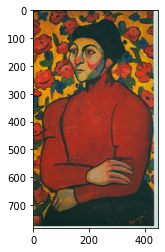

Date : 1907 
Artwork : Portrait of Philomene


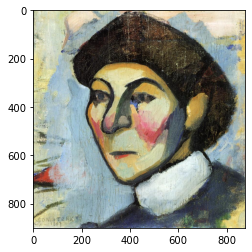

Date : 1907 
Artwork : Sleeping girl


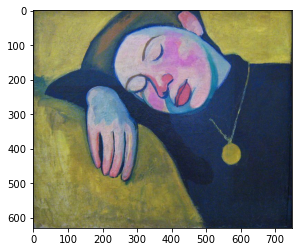

In [12]:
# Importer les images et les visualiser avec leur titre et date

dname = "fauvisme1904_1908"
for index, row in dff.iterrows():
    
    print(f"Date : {row.Date} \nArtwork : {row.Artwork}")
    
    
    path = os.path.join(dname, row.Filename)
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    plt.imshow(image)
    plt.show()

## **Visualiser avec matplotlib**

Matplotlib permet de visualiser les images en enfilade comme vu précédement. La librairie permet également de créer des graphiques auxquels il est possible d'ajouter des informations à l'image.

### Visualiser un boucle

Variante de visualisation en boucle

In [13]:
#Reprendre ma liste d'images

len(mes_images)

186

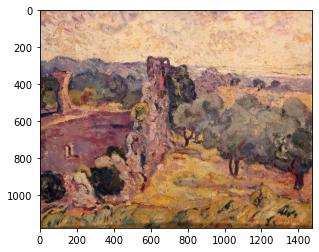

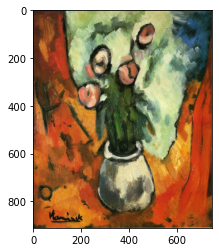

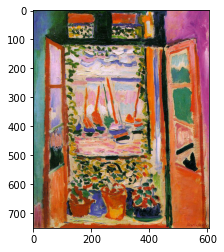

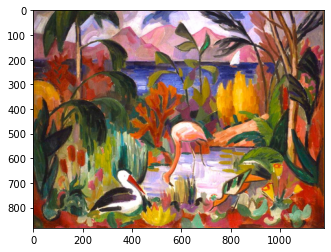

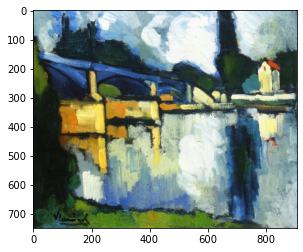

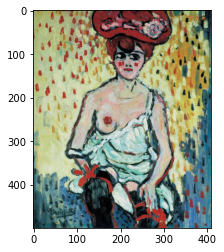

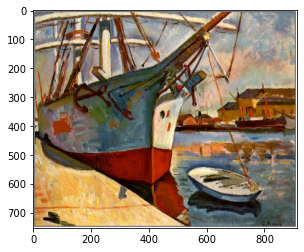

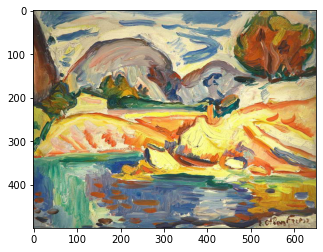

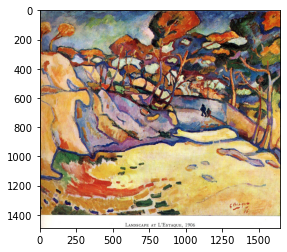

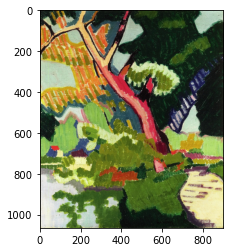

In [14]:
# Visualiser les 10 première

for i in mes_images[:10]:
    plt.imshow(i)
    plt.show()

### Les images sur un graphique

Cette librairie permet principalement de faire des graphiques. C'est une manière de visualiser les images

Text(0.5, 1.0, 'Image 2')

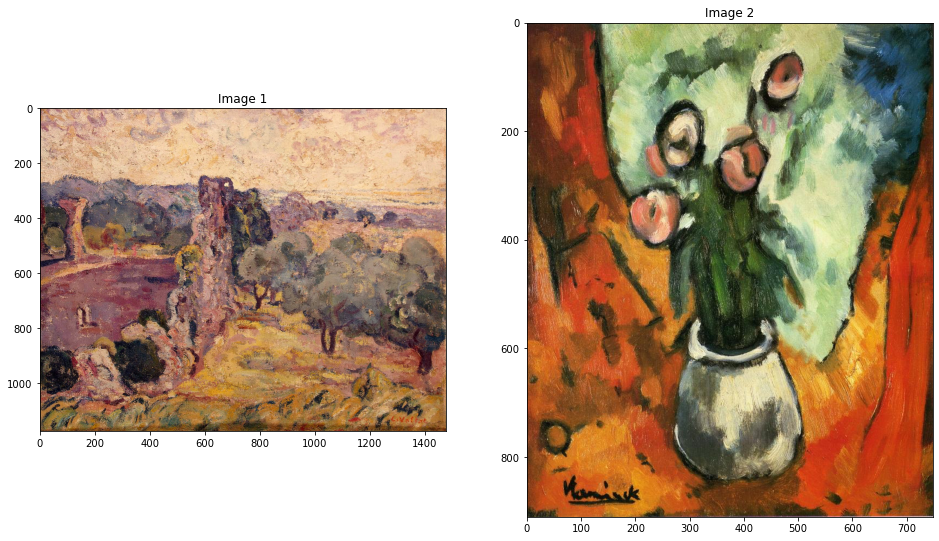

In [15]:
# visualiser deux images face à face

fig, ax = plt.subplots(1,2, figsize=(16,12))
ax[0].imshow(mes_images[0])
ax[0].set_title('Image 1')
ax[1].imshow(mes_images[1])
ax[1].set_title('Image 2')

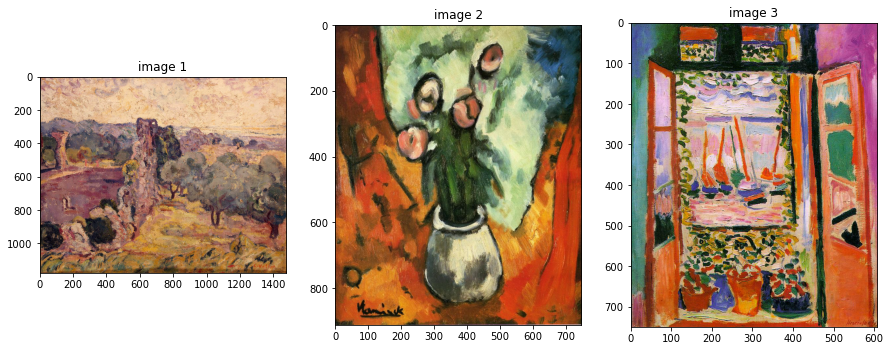

In [16]:
# visualiser 3 images

plt.figure(figsize=(15,10))
plt.subplot(131); plt.imshow(mes_images[0]); plt.title("image 1");
plt.subplot(132); plt.imshow(mes_images[1]); plt.title("image 2")
plt.subplot(133); plt.imshow(mes_images[2]); plt.title("image 3")
plt.show()

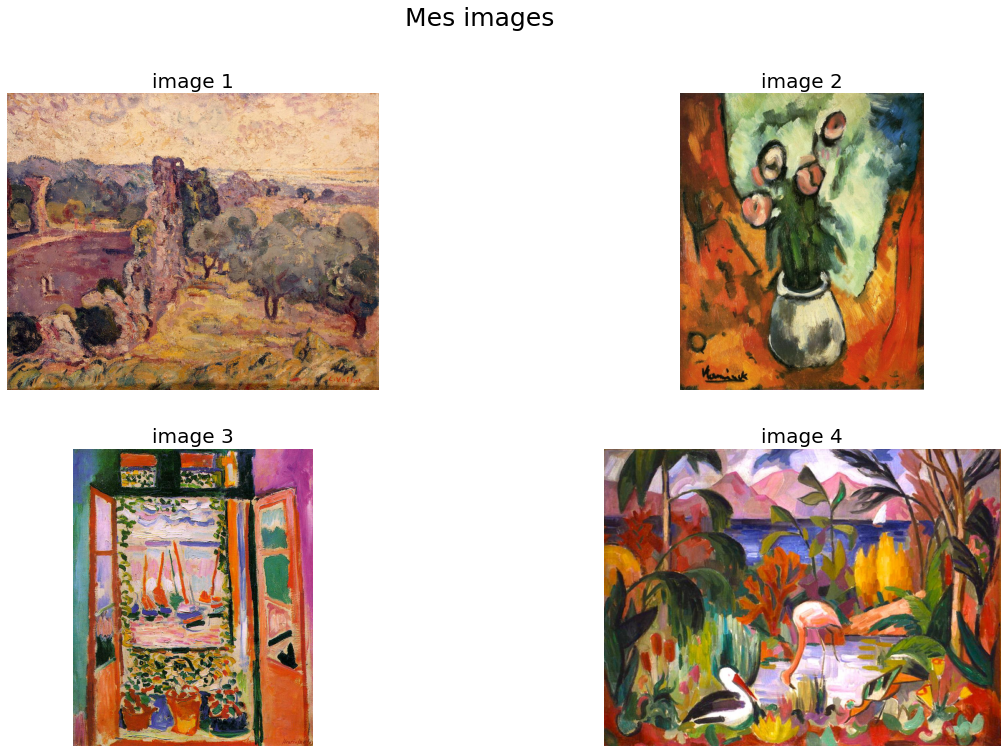

In [17]:
# visualiser 4 images

plt.figure(figsize=(20,12))
plt.subplot(221), plt.imshow(mes_images[0]), plt.axis('off'), plt.title('image 1', size=20)
plt.subplot(222), plt.imshow(mes_images[1]), plt.axis('off'), plt.title('image 2', size=20)
plt.subplot(223), plt.imshow(mes_images[2]), plt.axis('off'), plt.title('image 3', size=20)
plt.subplot(224), plt.imshow(mes_images[3]), plt.axis('off'), plt.title('image 4', size=20)
plt.suptitle('Mes images', size=25)
plt.show()

### Visualiser l'image et ses informations

La méthode précdente n'est pas très automatisé, surtout au niveau des métadonnées.

In [18]:
# On reprend notre dataframe avec Sonia Delaunay

dff

Style                Artwork          Artist  Date  \
66560  Fauvism              Philomene  Sonia Delaunay  1907   
66561  Fauvism  Portrait of Philomene  Sonia Delaunay  1907   
66562  Fauvism          Sleeping girl  Sonia Delaunay  1907   

                                                    Link  \
66560  https://uploads3.wikiart.org/images/sonia-dela...   
66561  https://uploads6.wikiart.org/images/sonia-dela...   
66562  https://uploads7.wikiart.org/images/sonia-dela...   

                                          Filename  
66560   1716482144495116223_SoniaDelaunay_1907.jpg  
66561  12692248801721896198_SoniaDelaunay_1907.jpg  
66562  12959314908433547397_SoniaDelaunay_1907.jpg

In [19]:
dff.Filename.iloc[0]

'1716482144495116223_SoniaDelaunay_1907.jpg'

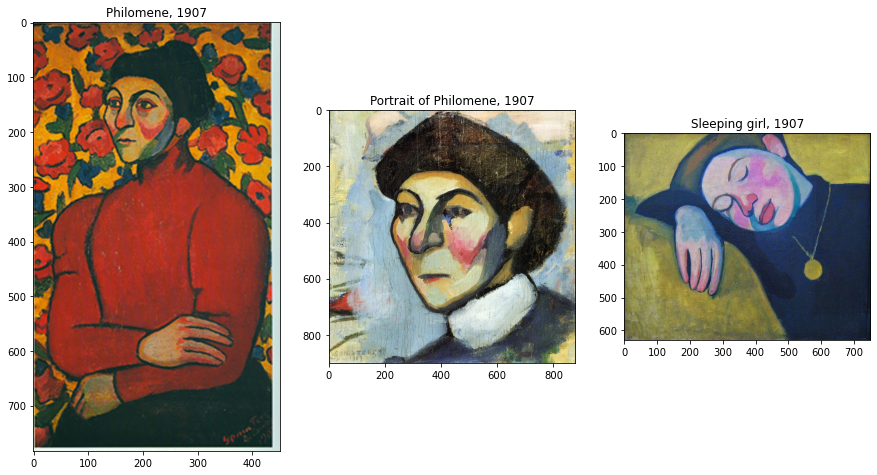

In [20]:
# visualiser mes 3 images

plt.figure(figsize=(15,10))
# 1 ligne, 3 colones
plt.subplot(131); plt.imshow(cv2.cvtColor(cv2.imread(os.path.join(dname, dff.Filename.iloc[0])), cv2.COLOR_BGR2RGB)); plt.title(f"{dff.Artwork.iloc[0]}, {dff.Date.iloc[0]}");
plt.subplot(132); plt.imshow(cv2.cvtColor(cv2.imread(os.path.join(dname, dff.Filename.iloc[1])), cv2.COLOR_BGR2RGB)); plt.title(f"{dff.Artwork.iloc[1]}, {dff.Date.iloc[1]}")
plt.subplot(133); plt.imshow(cv2.cvtColor(cv2.imread(os.path.join(dname, dff.Filename.iloc[2])), cv2.COLOR_BGR2RGB)); plt.title(f"{dff.Artwork.iloc[2]}, {dff.Date.iloc[2]}")
plt.show()

In [22]:
# Visualiser une image avec du texte

from PIL import Image
from PIL import ImageDraw

img = Image.open(os.path.join(dname, dff.Filename.iloc[0]))

txt = ImageDraw.Draw(img)

txt.text((28, 36), f"{dff.Artist.iloc[0]}, {dff.Artwork.iloc[0]}, {dff.Date.iloc[0]}", fill=(255, 255, 255))

img.show()


### Enregistrer ses visualisation 

In [ ]:
# Visualiser une image avec du texte et enregistrer

from PIL import Image
from PIL import ImageDraw

img = Image.open(os.path.join(dname, dff.Filename.iloc[0]))

txt = ImageDraw.Draw(img)

txt.text((28, 36), f"{dff.Artist.iloc[0]}, {dff.Artwork.iloc[0]}, {dff.Date.iloc[0]}", fill=(255, 255, 255))

img.show()

img.save(f"name_{dff.Filename.iloc[0]}", dpi=(300,300))

In [ ]:
# visualiser mes 3 images et enregistrer

plt.figure(figsize=(15,10))
plt.subplot(131); plt.imshow(cv2.cvtColor(cv2.imread(os.path.join(dname, dff.Filename.iloc[0])), cv2.COLOR_BGR2RGB)); plt.title(f"{dff.Artwork.iloc[0]}, {dff.Date.iloc[0]}");
plt.subplot(132); plt.imshow(cv2.cvtColor(cv2.imread(os.path.join(dname, dff.Filename.iloc[1])), cv2.COLOR_BGR2RGB)); plt.title(f"{dff.Artwork.iloc[1]}, {dff.Date.iloc[1]}")
plt.subplot(133); plt.imshow(cv2.cvtColor(cv2.imread(os.path.join(dname, dff.Filename.iloc[2])), cv2.COLOR_BGR2RGB)); plt.title(f"{dff.Artwork.iloc[2]}, {dff.Date.iloc[2]}")
plt.show()
plt.suptitle('Sonia Delaunay', size=25)
#plt.savefig(f"name2_{dff.Filename.iloc[0]}", dpi=300)

## **Visualiser en mosaïque**
### Une mosïque d'images redimensionnées

Pour pouvoir faire une mosaïque d'images, il faut au préalable les redimensionner en gardant les proportions: un petit rappel sur la manière pour le faire.

In [ ]:
# reprenons notre images

plt.imshow(mes_images[0])
plt.show()

In [ ]:
# Redimensionner en gardant les proportion

(h, w) = mes_images[0].shape[:2]
newh = 500
ratio = newh/ float(h)
newdim = (int(w * ratio), newh)
redim = cv2.resize(mes_images[0], newdim)
print(redim.shape, mes_images[0].shape)
plt.imshow(redim)
plt.show()

In [ ]:
# Redimensionner une image avec une autre en gardant les proportion 

(h, w) = mes_images[0].shape[:2]
newh = mes_images[1].shape[0]
ratio = newh/ float(h)
newdim = (int(w * ratio), newh)
redim = cv2.resize(mes_images[0], newdim)
print(redim.shape, mes_images[0].shape, mes_images[1].shape)
plt.imshow(redim)
plt.show()

### Concaténation verticale

Redimensionner les images selon leur largeur permet de les concaténer verticalement

In [ ]:
concat_h = cv2.hconcat([mes_images[1], redim])
plt.imshow(concat_h)
plt.show()

### Concaténation horizontale

Redimensionner les images selon leur hauteur permet de les concaténer horizontalement

In [ ]:
# avec deux images de dimensions différentes

print(mes_images[1].shape, mes_images[2].shape)

In [ ]:
h = mes_images[1].shape[0]
ratio = h/float(mes_images[2].shape[0])
newdim = (int(mes_images[2].shape[1]*ratio), h)
newdim

In [ ]:
# Opérer la changement de dimension puis concatener

redim2 = cv2.resize(mes_images[2], newdim)
conc_h = cv2.hconcat([redim2, mes_images[1]])
plt.imshow(conc_h)
plt.show()

In [ ]:
# si on met tout dans une cellule ?

img1 = mes_images[2]
img2 = mes_images[5]
filename = "concat.jpg"
h = img1.shape[0]
ratio = h/float(img2.shape[0])
newdim = (int(img2.shape[1]*ratio), h)
redim2 = cv2.resize(img2, newdim)
conc_h = cv2.hconcat([redim2, img1])
conc_hc = cv2.cvtColor(conc_h, cv2.COLOR_RGB2BGR)
#cv2.imwrite(filename, conc_hc)
plt.imshow(conc_h)
plt.show

**Et si on créait un script Python ?**

### Une fonction pour faire des mosaïques ?

<div class="alert alert-block alert-warning">
<b>Exercice</b>: créer une fonction qui prend en entrée le CSV, le nom d'un artiste (ici toujours Sonia Delaunay). La fonction doit concaténer horizontalement les images de l'artiste. En sortie l'image concaténée est enregistrée avec un message pour dire que tout s'est bien passée.</div>

### Level up

<div class="alert alert-block alert-warning">
<b>Exercice</b>: cette fois il s'agit de créer une mosaïque verticale et horizontale. Au terme, vous aurez une fonction qui prend comme arguments le nombre d'images par ligne, le CSV et le nom d'un artiste. Comme l'image doit être complète vous compléterez la ligne avec un rectangle de la couleur que vous voudrez. Evidemment, l'image doit être enregistrée à la fin.</div>